In [89]:
# Naomi Kaduwela
# Oct 18 2018
# Intro to Java & Python: HW 1

In [105]:
# DIRECTIONS: 
#       1. Run the 1st cell so all functions load (bubble sort, merge sort, and the runSorts function which
#          plots the time and creates the chart)
#       2. In the 2nd cell create the 3 parameters you want to run in each sort i.e.
#                   test_list = [0,4,2,3,1] 
#                   test_reverse = False
#                   test_key = None
#           *Note: The runSorts(test_list = test_list, test_reverse= test_reverse, test_key= test_key) 
#                 needs to be included when you run the second cell so that the output appears below

In [110]:
import timeit
import numpy as np
import matplotlib.pyplot as plt
import pandas
import inspect
import collections 

#-------------------------------------------------#
#Bubble Sort - run through the list n times, each time taking the largest number and slotting it in the array from 
# right to left
#-------------------------------------------------#

nComp = 0
nSwap = 0

def bubble_sort(a_list, key = None, reverse = False): #check key = 1 vs key = 0
    global nComp
    global nSwap
    newList = []
    
    start = timeit.default_timer()
    
    #Check if list is empty & return empty list
    if(not a_list):
        stop = timeit.default_timer()
        return newList, 0, 0, stop-start
    
    #Create new list handling for different data types 
    if(type(a_list)==dict or type(a_list) == tuple or type(a_list[0])==tuple or type(a_list[0])==dict):
        newList = list(a_list)
    elif(type(a_list[0])==int or type(a_list[0]) == str):
        newList = a_list 
        
    #Key data quality checks. 
    if(key == None or key ==0):
        key = 1

    for pass_num in range(len(newList) - 1, 0, -1):
        for i in range(pass_num):
            nComp += 1
            if(key ==1):
                if newList[i] > newList[i + 1]:                
                    newList[i],newList[i + 1] = newList[i + 1] ,newList[i]
                    nSwap += 1
            elif(callable(key)):
                if key(newList[i]) > key(newList[i + 1]):                
                    newList[i],newList[i + 1] = newList[i + 1] ,newList[i]
                    nSwap += 1

    #Reverse list if "True" parameter was passed
    if reverse == True:
        newList.reverse()

    stop = timeit.default_timer()
    
    #Print outs
    print("BUBBLE SORT ::")
    print("Bubble Output List",newList)
    print("number of comparisons:",nComp)
    print("number of swaps:",nSwap)
    print("")


#-------------------------------------------------#
# MERGE SORT - Split array in half recrusively until there is only 1 element, then merge all the elements back 
# by comparing each leaf node value to slot each number in the correct place we we traverse back up to the full array
#-------------------------------------------------#

def merge_sort(sort_list,numbComp = [],key=None,reverse = False):
    
    # Feed dictionary data into a list
    if type(sort_list) == dict:
        x = list(sort_list.keys())
        y = list(sort_list.values())
        sort_list = [[x[i],y[i]] for i in range(len(x))]

    # Modify created list based on key input 
    if key == None or key == 0:
        new_sort_list = sort_list[:len(sort_list)]
    elif type(key) == int:
        new_sort_list = [[sort_list[i][key],i] for i in range(len(sort_list))]
    else:
        new_sort_list = [[key(sort_list[i]),i] for i in range(len(sort_list))]

    # Divide and join data through recursive funtion 
    def recursively_merge(new_sort_list):
        if len(new_sort_list)>1:
            mid = len(new_sort_list)//2
            first_half = new_sort_list[:mid]
            last_half = new_sort_list[mid:]
            recursively_merge(first_half)
            recursively_merge(last_half)

            i=0
            j=0
            k=0

            while i < len(first_half) and j < len(last_half):
                if first_half[i] < last_half[j]:
                    new_sort_list[k]=first_half[i]
                    i=i+1
                    numbComp.append(1)
                else:
                    new_sort_list[k]=last_half[j]
                    j=j+1
                    numbComp.append(1)
                k=k+1

            while i < len(first_half):
                new_sort_list[k]=first_half[i]
                i=i+1
                k=k+1
                numbComp.append(1)

            while j < len(last_half):
                new_sort_list[k]=last_half[j]
                j=j+1
                k=k+1
                numbComp.append(1)
        return new_sort_list,numbComp

    merged_list_with_comparsion = recursively_merge(new_sort_list)
    merged_list = merged_list_with_comparsion[0]

    # Reverse if user overrides default reverse value
    if reverse == True:
        merged_list.reverse()

    # Output sort results based on user key input
    if key == None or key == 0:
        merge_sorted_list = merged_list[:len(merged_list)]
    elif type(key) == int:
        keyOrderedList = [merged_list[i][1] for i in range(len(merged_list))]
        merge_sorted_list = [sort_list[keyOrderedList[i]] for i in range(len(keyOrderedList))]
    else:
        keyOrderedList = [merged_list[i][1] for i in range(len(merged_list))]
        merge_sorted_list = [sort_list[keyOrderedList[i]] for i in range(len(keyOrderedList))]

    # print statements for merge
    print("MERGE SORT ::")
    print("Merge Output List:", merge_sorted_list)
    print("Number of comparisons:",sum(merged_list_with_comparsion[1]),"\n")


    
#-------------------------------------------------#
# COMPARE SORTS - Function to compare all sort algorihtms and print chart/table below
#-------------------------------------------------#

def runSorts(test_list, test_key, test_reverse):
    #Print output
    print("Input List:", test_list)
    print("Input Key:", test_key)
    print("Input Reverse:", test_reverse, "\n")
    
    #------------------ Function Timers 
    #bubble_sorted = bubble_sort(test_list, key = test_key, reverse = test_reverse)
    bubbleTime = timeit.timeit(lambda y = test_list: bubble_sort(y,key = test_key, reverse = test_reverse), number = 1)
    mergeTime = timeit.timeit(lambda x = test_list: merge_sort(x, key = test_key, reverse = test_reverse), number =1)

    #-------------------------------------------------#
    #  Print Output
    #-------------------------------------------------#

    #Sorted
    print("BUILT IN SORTED FUNCTION :: ")
    temp = sorted(test_list,key = test_key, reverse = test_reverse)
    print("Sorted Output List", temp, "\n")
    sortedTime = timeit.timeit(lambda y = test_list,key = test_key, reverse = test_reverse: sorted(y), number =1)

    #-------------------------------------------------#
    #  Plot time differences()
    #-------------------------------------------------#

    # Plot - define x and y axis and input data
    sortTypes = ('Bubble', 'Merge', 'Sorted')
    y_pos = np.arange(len(sortTypes))
    performance = [bubbleTime, mergeTime, sortedTime]
    
    # Plot labels & display
    plt.bar(y_pos, performance, align='center', alpha=0.5)
    plt.xticks(y_pos, sortTypes)
    plt.ylabel('Time to Run')
    plt.xlabel('Type of Sort')
    plt.title('Sort Function Run Time')
    plt.show()
    
    # Table output 
    d = {'Function Name': sortTypes, 'Speed to Execute':performance}
    df = pandas.DataFrame(data = d)
    print(df[0:3])

In [111]:
# DIRECTIONS (reminder):
#       In the 2nd cell create the 3 parameters you want to run in each sort i.e.
#                   test_list = [0,4,2,3,1] 
#                   test_reverse = False
#                   test_key = None
#       *Note: The runSorts(test_list = test_list, test_reverse= test_reverse, test_key= test_key) 
#           needs to be included when you run the second cell so that the output appears below

Input List: [(1, 'hi', 234), (0, 'bye', 342), (34, 'byeeeeee', 2), (3, 'hiii', 23523)]
Input Key: <function <lambda> at 0x11c2d66a8>
Input Reverse: False 

BUBBLE SORT ::
Bubble Output List [(1, 'hi', 234), (0, 'bye', 342), (3, 'hiii', 23523), (34, 'byeeeeee', 2)]
number of comparisons: 12
number of swaps: 4

MERGE SORT ::
Merge Output List: [(1, 'hi', 234), (0, 'bye', 342), (3, 'hiii', 23523), (34, 'byeeeeee', 2)]
Number of comparisons: 16 

BUILT IN SORTED FUNCTION :: 
Sorted Output List [(1, 'hi', 234), (0, 'bye', 342), (3, 'hiii', 23523), (34, 'byeeeeee', 2)] 



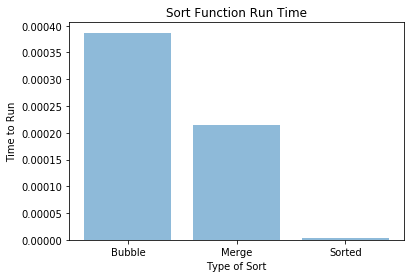

  Function Name  Speed to Execute
0        Bubble          0.000387
1         Merge          0.000215
2        Sorted          0.000003


In [113]:

#-------------------------------------------------#
#MAIN - TEST CASES 
#-------------------------------------------------#

## 1. EMPTY LIST -> PASS for all 3 
#test_list = []
#test_reverse = False
#test_key = 1

## 2. INTEGER -> pass for all 3 
#test_list = [0,4,2,3,1] 
#test_reverse = False
#test_key = None

## 3. STRING -> pass for all 3 
#test_list = ["a", "z", "y", "d"]
#test_reverse = True
#test_key = None

## 4. TUPLE -> pass for all 3 
test_list = [(1, "hi", 234), (0, "bye", 342), (34, "byeeeeee", 2), (3, "hiii", 23523)]
test_reverse = False
test_key = lambda x:sum([ord(item) for item in str(x)]) 

## 5. DICTIONARY -> pass for all 3
#test_list = {'john': 'C','jane': 'B','zan': 'Z','van': 'A','sally': 'Z'}
#test_reverse = True
#test_key = lambda x:sum([ord(item) for item in str(x)]) 

runSorts(test_list = test_list, test_reverse= test_reverse, test_key= test_key)